# Подготовка данных

## Загрузка данных с диска

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("train.csv")  # файл train.csv должен лежать в директории, где запущен ноутбук

Посмотрим на первые несколько строк:

In [3]:
data.head()

,week,competitors_spendings,seasonality,fb_page_daily_viral_reach,holidays_,sms_resips,email,pandemia_search,vk_reach,price_ratio_,pr_coverage,app_clicks,ots,fb_page_daily_paid_reach,push,price_index_macroeconomics,price_index_sbermarket,rebranding_contin,order_app
0,2019-01,12849226.0,1.008971,2219,6.0,0.0,0,NaN,1965,1.499212,NaN,1098,NaN,484530.0,0.0,101.36,151.960146,0,7620.6
1,2019-02,12849226.0,0.745846,1841,2.0,0.0,0,NaN,1772,1.576162,NaN,2025,NaN,523417.0,0.0,101.36,159.759803,0,6505.2
2,2019-03,12849226.0,0.852687,3103,0.0,0.0,0,NaN,1862,1.578232,NaN,2921,NaN,28250.0,0.0,101.36,159.969601,0,7764.9
3,2019-04,12849226.0,1.067596,1838,0.0,0.0,0,NaN,44102,1.579293,NaN,19691,NaN,238273.0,0.0,101.36,160.077088,0,9254.7
4,2019-05,12849226.0,1.127907,1541,0.0,0.0,0,NaN,93440,1.552700,NaN,10472,NaN,101968.0,0.0,100.89,156.651941,0,9133.8


Приведем колонку с неделями к специальному типу `date`, чтобы с ней можно было легко работать в дальнейшем (лайфхак [отсюда](https://stackoverflow.com/questions/17087314/get-date-from-week-number)):

In [4]:
data["week"] = pd.to_datetime(data["week"] + "-1", format="%Y-%W-%w")

In [5]:
data.head()

,week,competitors_spendings,seasonality,fb_page_daily_viral_reach,holidays_,sms_resips,email,pandemia_search,vk_reach,price_ratio_,pr_coverage,app_clicks,ots,fb_page_daily_paid_reach,push,price_index_macroeconomics,price_index_sbermarket,rebranding_contin,order_app
0,2019-01-07,12849226.0,1.008971,2219,6.0,0.0,0,NaN,1965,1.499212,NaN,1098,NaN,484530.0,0.0,101.36,151.960146,0,7620.6
1,2019-01-14,12849226.0,0.745846,1841,2.0,0.0,0,NaN,1772,1.576162,NaN,2025,NaN,523417.0,0.0,101.36,159.759803,0,6505.2
2,2019-01-21,12849226.0,0.852687,3103,0.0,0.0,0,NaN,1862,1.578232,NaN,2921,NaN,28250.0,0.0,101.36,159.969601,0,7764.9
3,2019-01-28,12849226.0,1.067596,1838,0.0,0.0,0,NaN,44102,1.579293,NaN,19691,NaN,238273.0,0.0,101.36,160.077088,0,9254.7
4,2019-02-04,12849226.0,1.127907,1541,0.0,0.0,0,NaN,93440,1.552700,NaN,10472,NaN,101968.0,0.0,100.89,156.651941,0,9133.8


## Разбиение на обучающую и тестовую выборку

In [6]:
# На всякий случай отсортируем по дате

data = data.sort_values("week")

In [7]:
data

,week,competitors_spendings,seasonality,fb_page_daily_viral_reach,holidays_,sms_resips,email,pandemia_search,vk_reach,price_ratio_,pr_coverage,app_clicks,ots,fb_page_daily_paid_reach,push,price_index_macroeconomics,price_index_sbermarket,rebranding_contin,order_app
0,2019-01-07,1.284923e+07,1.008971,2219,6.0,0.0,0,NaN,1965,1.499212,NaN,1098,NaN,484530.0,0.0,101.36,151.960146,0,7620.600000
1,2019-01-14,1.284923e+07,0.745846,1841,2.0,0.0,0,NaN,1772,1.576162,NaN,2025,NaN,523417.0,0.0,101.36,159.759803,0,6505.200000
2,2019-01-21,1.284923e+07,0.852687,3103,0.0,0.0,0,NaN,1862,1.578232,NaN,2921,NaN,28250.0,0.0,101.36,159.969601,0,7764.900000
3,2019-01-28,1.284923e+07,1.067596,1838,0.0,0.0,0,NaN,44102,1.579293,NaN,19691,NaN,238273.0,0.0,101.36,160.077088,0,9254.700000
4,2019-02-04,1.284923e+07,1.127907,1541,0.0,0.0,0,NaN,93440,1.552700,NaN,10472,NaN,101968.0,0.0,100.89,156.651941,0,9133.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2020-12-07,3.514336e+08,0.797074,3923,NaN,98730.0,559023,2552612.0,5817091,1.562042,63500000.0,8562870,51862.150460,40756625.0,NaN,101.71,158.875299,1,665185.348386
101,2020-12-14,3.514336e+08,0.902144,1336,NaN,159604.0,2619532,2496734.0,577940,1.527899,3500000.0,14549709,72230.423541,37680056.0,NaN,101.71,155.402615,1,652379.497127
102,2020-12-21,3.514336e+08,0.870342,1826,NaN,226907.0,1899226,2421822.0,6111738,1.568095,26700000.0,6978942,72121.630550,26435790.0,NaN,101.71,159.490980,1,712776.256924
103,2020-12-28,3.514336e+08,1.008971,1780,NaN,171201.0,2075833,2415153.0,7872782,1.603931,19300000.0,6492044,60532.099207,16353591.0,NaN,101.71,163.135796,1,859594.393573


Оставим последние 10 недель на тест

In [8]:
train = data[:-10]

In [9]:
test = data[-10:]

In [10]:
print(f"Размер обучающей выборки: {len(train)}")
print(f"Размер тестовой выборки: {len(test)}")

Размер обучающей выборки: 95
Размер тестовой выборки: 10


## Подготовка данных для построения модели

## Нормализация

Изучите документацию [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) и [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Какой лучше использовать и для каких колонок? Внимание! Калибровать (`scaler.fit`) скейлеры нужно ТОЛЬКО на обучающей выборке. Примените скейлеры для ваших данных.

## Замена пропусков

В данных присутствуют пропуски. Их необходимо заполнить какими-то числами. В `pandas` это можно легко сделать при помощи `fillna` - почитайте о нем [тут](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html). Какие колонки как лучше заполнять? На данные в одной колонке полезно смотреть при помощи гистограммы. Построить ее легко можно при помощи:

<AxesSubplot:>

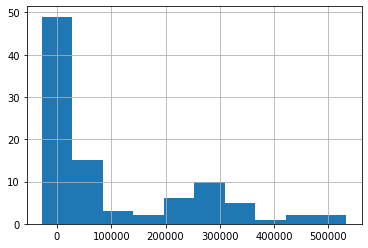

In [11]:
train["order_app"].hist(bins=10)

Если вы хотите взять только строки за определенный период времени, то это можно сделать так:

In [12]:
from datetime import datetime

In [13]:
start_date = datetime(2019, 3, 1)  # 1 февраля 2019 года
end_date = datetime(2019, 5, 4)  # 4 апреля 2019 года

In [14]:
train[(train["week"] > start_date) & (train["week"] < end_date)]

,week,competitors_spendings,seasonality,fb_page_daily_viral_reach,holidays_,sms_resips,email,pandemia_search,vk_reach,price_ratio_,pr_coverage,app_clicks,ots,fb_page_daily_paid_reach,push,price_index_macroeconomics,price_index_sbermarket,rebranding_contin,order_app
8,2019-03-04,20353327.5,1.047454,6138,0.0,0.0,0,NaN,35936,1.545915,NaN,14045,NaN,154816.0,0.0,100.57,155.472650,0,6532.685121
9,2019-03-11,19955847.5,1.127784,1439,1.0,0.0,0,NaN,100804,1.642271,NaN,23314,NaN,335833.0,0.0,100.57,165.163244,0,11388.915388
10,2019-03-18,19955847.5,1.087044,2353,0.0,0.0,0,NaN,16991,1.754682,NaN,14744,NaN,127923.0,0.0,100.57,176.468335,0,11411.573519
11,2019-03-25,19955847.5,1.236907,1218,0.0,0.0,0,NaN,8001,1.695400,NaN,13642,NaN,181261.0,0.0,100.57,170.506412,0,13279.810752
12,2019-04-01,19955847.5,1.165207,3037,0.0,0.0,0,NaN,3086,1.668538,NaN,232597,NaN,52261.0,0.0,100.57,167.804844,0,11967.377362
13,2019-04-08,16595278.0,1.295782,2048,0.0,0.0,0,NaN,77956,1.651961,NaN,29568,NaN,308616.0,0.0,100.46,165.955978,0,14521.815153
14,2019-04-15,16595278.0,1.313502,1732,0.0,0.0,42900,NaN,4495,1.583988,NaN,52597,NaN,120277.0,0.0,100.46,159.127421,0,15676.741330
15,2019-04-22,16595278.0,1.121689,738,0.0,0.0,4468,NaN,170778,1.708024,NaN,60759,NaN,84103.0,0.0,100.46,171.588095,0,12242.188702
16,2019-04-29,16595278.0,1.147554,1034,0.0,0.0,5837,NaN,7557,2.004483,NaN,21966,NaN,48652.0,0.0,100.46,201.370313,0,9442.162193


Возможно, какие-то признаки имеют разное распределение в разные промежутки времени? Как можно лучше всего произвести замену пропусков для таких признаков? Пример замены пропусков на среднее значение:

In [15]:
train["holidays_"] = train["holidays_"].fillna(train["holidays_"].mean())

<ipython-input-15-4d22ad70210f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["holidays_"] = train["holidays_"].fillna(train["holidays_"].mean())


В рамках бейслайна просто заменим все пропуски на нули:

In [16]:
train = train.fillna(0)
test = test.fillna(0)


# Обучение модели

Обучите модель на обучающей выборке:

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [19]:
X_train = train.drop(columns=["week", "order_app"])  # в признаки идут все данные, кроме этих колонок
y_train = train["order_app"]  # целевая переменная

In [20]:
model.fit(X_train, y_train)

LinearRegression()

Получим предсказания модели на тестовой выборке:

In [21]:
X_test = test.drop(columns=["week", "order_app"])
y_true = test["order_app"]

y_pred = model.predict(X_test)

Рассчитаем метрику качества предсказайни [MSE](https://en.wikipedia.org/wiki/Mean_squared_error):

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
mean_squared_error(y_true, y_pred)

49222605620.111435

🤮

Посмотрим глазами на реальные значения и предсказания:

In [24]:
y_true.values

array([489398.3883126, 522536.9124573, 630737.7672453, 630104.5026276,
       689511.0483417, 665185.348386 , 652379.4971265, 712776.2569239,
       859594.3935735, 828778.8557724])

In [25]:
y_pred

array([549747.11374854, 480175.82387464, 550460.21758125, 530041.81115649,
       467501.49851401, 470037.2960932 , 544374.91832185, 475260.21452222,
       472921.12164283, 422126.03417381])

Такого простого подхода явно недостаточно!